In [1124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1125]:
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import chi2_contingency
from scipy.stats import kruskal
from scipy.stats import shapiro
from scipy.stats import levene

In [1126]:
from scipy.stats import ttest_ind

In [1127]:
df=pd.read_csv('../Data/clean_data.csv')

In [1128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   loan_limit                148670 non-null  object 
 1   Gender                    148670 non-null  object 
 2   loan_type                 148670 non-null  object 
 3   loan_purpose              148670 non-null  object 
 4   business_or_commercial    148670 non-null  object 
 5   loan_amount               148670 non-null  float64
 6   rate_of_interest          148670 non-null  float64
 7   Upfront_charges           148670 non-null  float64
 8   property_value            148670 non-null  float64
 9   occupancy_type            148670 non-null  object 
 10  income                    148670 non-null  float64
 11  credit_type               148670 non-null  object 
 12  Credit_Score              148670 non-null  object 
 13  co-applicant_credit_type  148670 non-null  o

## Helper Functions

In [1129]:
def plot(df,x_var,hue_var,title,dodge=True,rotation=0):
        
    sns.countplot(data=df, x=x_var, hue=hue_var)
    
    plt.xlabel(x_var)
    plt.ylabel("Number of Records")
    plt.title(f"{title}")
    plt.xticks(rotation=rotation)
    
    plt.show()

In [1130]:
def crosstab(df,column,index,margins=True):
    
    return pd.crosstab(index=df[index],columns=df[column],margins=margins)

In [1131]:
def normalize(df,column,index,margins=True,normalize='index'):
    
    return pd.crosstab(index=df[index],columns=df[column],margins=margins,normalize=normalize)*100

In [1132]:
def hypothesis_test(crosstab,col,alpha=0.05):
    
    chi_stat, pvalue, df, exp_freq = chi2_contingency(gen)
    

    if pvalue < alpha:
    
        print(f'{col} has an impact on loan defaulters.')
    else:
    
        print(f'{col} has no impact on loan defaulters.')

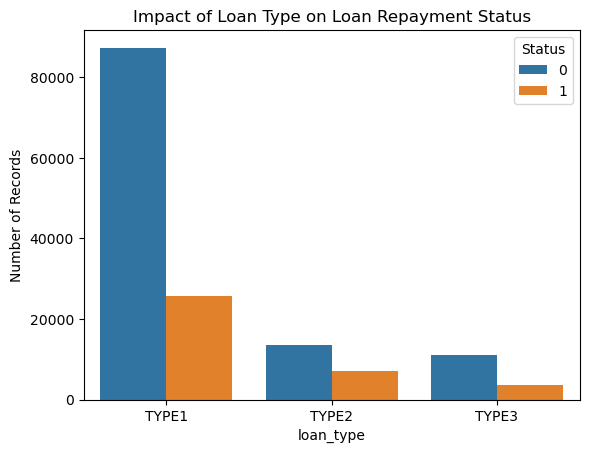

In [1133]:
plot(df,'loan_type','Status','Impact of Loan Type on Loan Repayment Status')

In [1134]:
normalize(df,'Status','loan_type')

Status,0,1
loan_type,,
TYPE1,77.225133,22.774867
TYPE2,65.456122,34.543878
TYPE3,74.944011,25.055989
All,75.355485,24.644515


In [1135]:
gen=crosstab(df,'Status','loan_type')

In [1136]:
hypothesis_test(gen,'Loan Type')

Loan Type has an impact on loan defaulters.


### - Though all type of loans have defaulters, the proportion of defaulter to non-defaulter is very high in Type 1   and Type 3 loans.
### - Number of Type 3 loans are very less compared to Type 1 loans.
### - Thus Type 1 loans offer a high risk to the lenders compared to Type 3 loans.
### - Loan type has an impact on the Loan defautlers which is proved by hypothesis test.

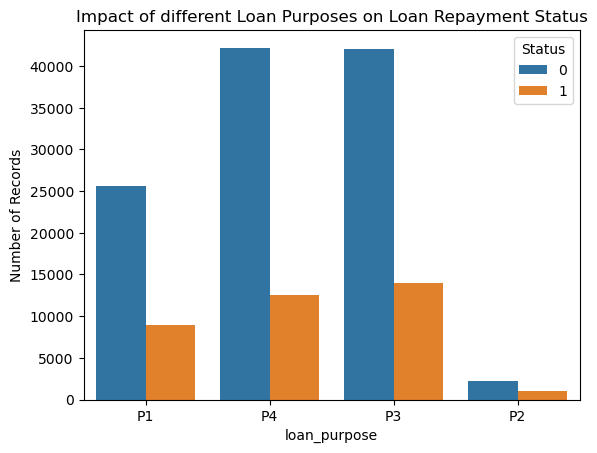

In [1137]:
plot(df,'loan_purpose','Status','Impact of different Loan Purposes on Loan Repayment Status')

In [1138]:
normalize(df,'Status','loan_purpose')

Status,0,1
loan_purpose,,
P1,74.123201,25.876799
P2,66.921197,33.078803
P3,74.975030,25.024970
P4,77.025128,22.974872
All,75.355485,24.644515


In [1139]:
gen=crosstab(df,'Status','loan_purpose')

In [1140]:
hypothesis_test(gen,'Loan Purpose')

Loan Purpose has an impact on loan defaulters.


### - P1, P3 and P4 have higher defaulters compared to non-defaulters. 

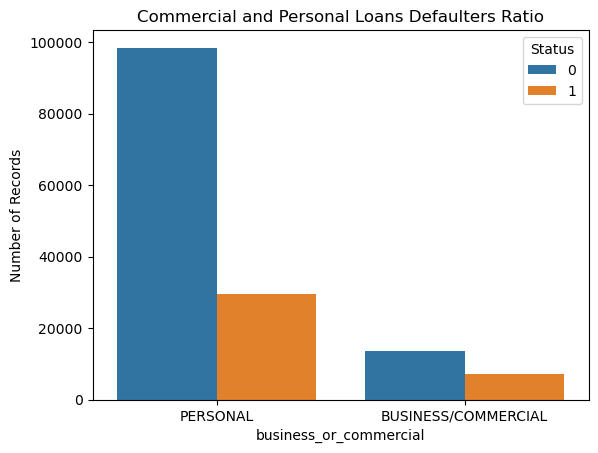

In [1141]:
plot(df,'business_or_commercial','Status','Commercial and Personal Loans Defaulters Ratio')

In [1142]:
gen=crosstab(df,'Status','business_or_commercial')

In [1143]:
normalize(df,'Status','business_or_commercial')

Status,0,1
business_or_commercial,,
BUSINESS/COMMERCIAL,65.456122,34.543878
PERSONAL,76.962348,23.037652
All,75.355485,24.644515


In [1144]:
hypothesis_test(gen,'Loan Type')

Loan Type has an impact on loan defaulters.


### - Lenders giving personal loans are at high risk of retrieval whereas Business/Commercial Loans are returned without much default. 

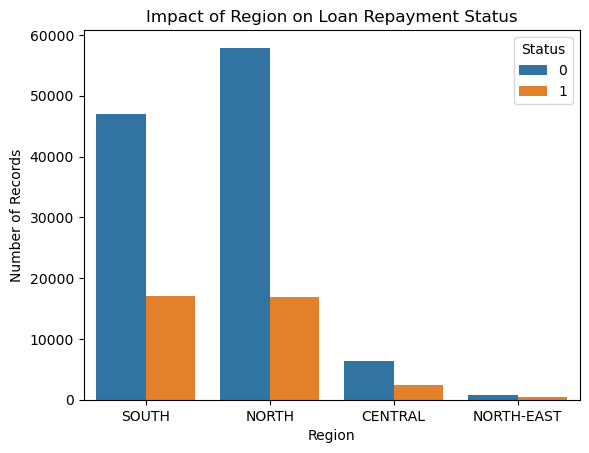

In [1145]:
plot(df,'Region','Status','Impact of Region on Loan Repayment Status')

In [1146]:
gen=crosstab(df,'Status','Region')

In [1147]:
normalize(df,'Status','Region')

Status,0,1
Region,,
CENTRAL,72.461768,27.538232
NORTH,77.488558,22.511442
NORTH-EAST,69.554656,30.445344
SOUTH,73.370720,26.629280
All,75.355485,24.644515


In [1148]:
hypothesis_test(gen,'Region')

Region has an impact on loan defaulters.


### - Borrowers from South and North Region fall mostly under the defaulters list. 

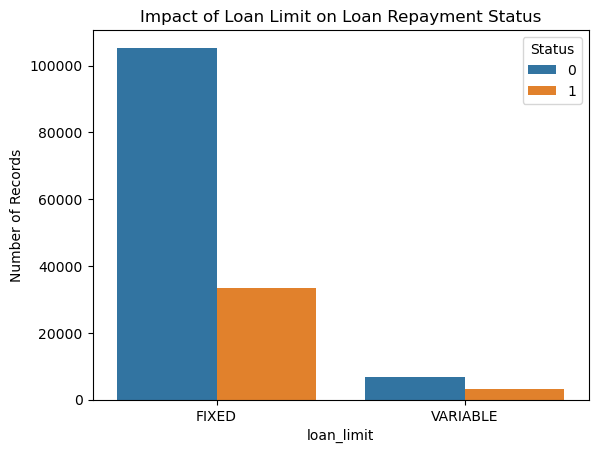

In [1149]:
plot(df,'loan_limit','Status','Impact of Loan Limit on Loan Repayment Status')

In [1150]:
gen=crosstab(df,'Status','loan_limit')

In [1151]:
normalize(df,'Status','loan_limit')

Status,0,1
loan_limit,,
FIXED,75.971938,24.028062
VARIABLE,66.786931,33.213069
All,75.355485,24.644515


In [1152]:
hypothesis_test(gen,'Loan Limit')

Loan Limit has an impact on loan defaulters.


### - Borrowers of fixed loans fall more under defaulters cloud than borrowers of variable loans.  

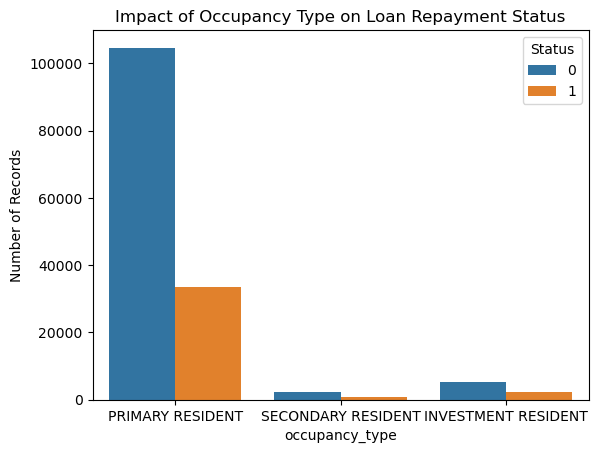

In [1153]:
plot(df,'occupancy_type','Status','Impact of Occupancy Type on Loan Repayment Status')

In [1154]:
gen=crosstab(df,'Status','occupancy_type')

In [1155]:
normalize(df,'Status','occupancy_type')

Status,0,1
occupancy_type,,
INVESTMENT RESIDENT,70.013624,29.986376
PRIMARY RESIDENT,75.695545,24.304455
SECONDARY RESIDENT,72.866731,27.133269
All,75.355485,24.644515


In [1156]:
hypothesis_test(gen,'Occupancy Type')

Occupancy Type has an impact on loan defaulters.


### - Lenders face high risk of retrieval from Primary Residents.  

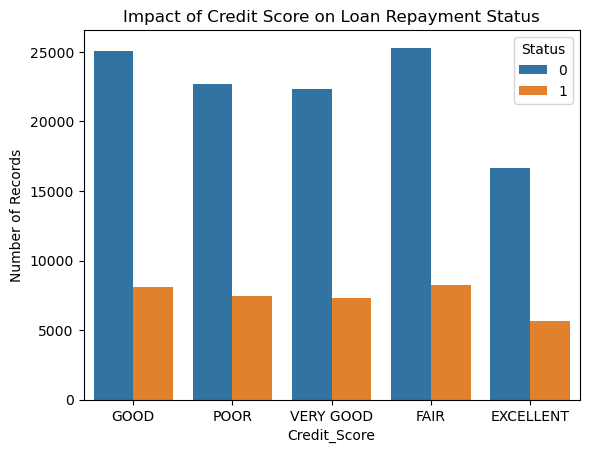

In [1157]:
plot(df,'Credit_Score','Status','Impact of Credit Score on Loan Repayment Status')

In [1158]:
crosstab(df,'Status','Credit_Score')

Status,0,1,All
Credit_Score,,,
EXCELLENT,16632,5619,22251
FAIR,25311,8209,33520
GOOD,25051,8083,33134
POOR,22694,7430,30124
VERY GOOD,22343,7298,29641
All,112031,36639,148670


In [1159]:
normalize(df,'Status','Credit_Score')

Status,0,1
Credit_Score,,
EXCELLENT,74.747202,25.252798
FAIR,75.510143,24.489857
GOOD,75.605119,24.394881
POOR,75.335281,24.664719
VERY GOOD,75.378698,24.621302
All,75.355485,24.644515


In [1160]:
hypothesis_test(gen,'Credit Score')

Credit Score has an impact on loan defaulters.


### - Credit Score of Defaulters is not giving a clear picture as we have 4 different type of credit scores which may vary slightly.

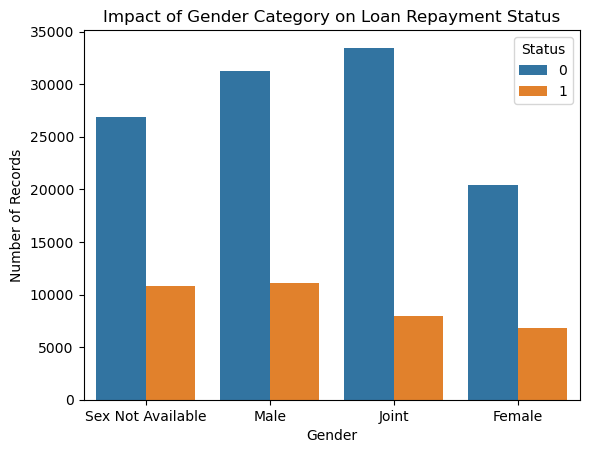

In [1161]:
plot(df,'Gender','Status','Impact of Gender Category on Loan Repayment Status')

In [1162]:
gen=crosstab(df,'Status','Gender')

In [1163]:
normalize(df,'Status','Gender')

Status,0,1
Gender,,
Female,74.884472,25.115528
Joint,80.837701,19.162299
Male,73.808624,26.191376
Sex Not Available,71.409225,28.590775
All,75.355485,24.644515


In [1164]:
hypothesis_test(gen,'Gender')

Gender has an impact on loan defaulters.


### - Joint Applicants are in higher defaulters category.

# Observations :

### High Risk for Lenders :
###               - Type 1 Loans
###               - Loans given for p1,p3 or p4 purpose
###               - Fixed and Personal Loans
###               - Borrowers from North and South Regions 
###               - Borrowers who are primary residents

## We have two groups of data.

### Loan defautlers and Loan non-defaulters

In [1165]:
default=df.loc[df['Status_Category']=='DEFAULTER']

In [1166]:
default.to_csv('../Data/defaulters_data.csv',index=False)

In [1167]:
non_default=df.loc[df['Status_Category']=='COMPLAINT']

In [1168]:
non_default.to_csv('../Data/non-defaulters_data.csv',index=False)

In [1169]:
default.shape

(112031, 19)

In [1170]:
non_default.shape

(36639, 19)

### Helper Functions 

In [1171]:
def test_for_normality(df,col):
    
    print('***********')
    
    print('QQ PLOT')
    
    print('***********\n')
    
    qqplot(df[col],line="s")
    plt.show()
    
    print('***********')
    
    print('HISTOGRAM')
    
    print('***********\n')
    
    sns.histplot(data=df,x=col,kde=True,line_kws={'color': 'r', 'lw': 5})
    plt.show()
                    

In [1172]:
def test_for_variance(df1,df2,col,title):
    
    
    print('***************************')
    
    print(f'Levene Test for checking equality of Variance of {title} across defaulter and non-defaulters')
    
    print('***************************\n')
    
    
    levene_stat,pvalue=levene(df1[col],df2[col])

    if pvalue<0.05:
    
        print('Variances are not equal')
    
    else:
    
        print('Variances are equal')
    



# Normalising the data 

## Random Sampling
### Sample Size = 1000
### Iterations = 1000

In [1173]:
def sampling(df,col):
    
    sample_means=[]
    
    for i in range(1000):
        
        data=df[col].sample(n=1000)
        
        sample_means.append(data.mean())
        
    sample=pd.DataFrame(sample_means, columns = [col])
    
    return sample
        

In [1174]:
def two_sample_ttest(df1,df2,title,alternative='greater',alpha=0.05,variance=True):
    
    t_stat,pvalue=ttest_ind(df1,df2,alternative=alternative,equal_var=variance)
    
    if pvalue < 0.05 :
        
        if variance:
        
            print(f'Since the pvalue is less than the confidence level, we can conclude that {title} of defaulters is {alternative} than that of non_defaulters.Hence {title} impacts Loan Status.')
            
        else:
            
            print(f'Since the pvalue is less than the confidence level, we can conclude that {title} of defaulters is not equal to non_defaulters.Hence {title} impacts Loan Status.')
        
    else:
                
            print(f'Since the pvalue is more than the confidence level, we can conclude that {title} of defaulters is more or less same as that of non_defaulters.Hence {title} has no impact on Loan Status.')
            

## Loan Amount vs Loan Status 

***********
QQ PLOT
***********



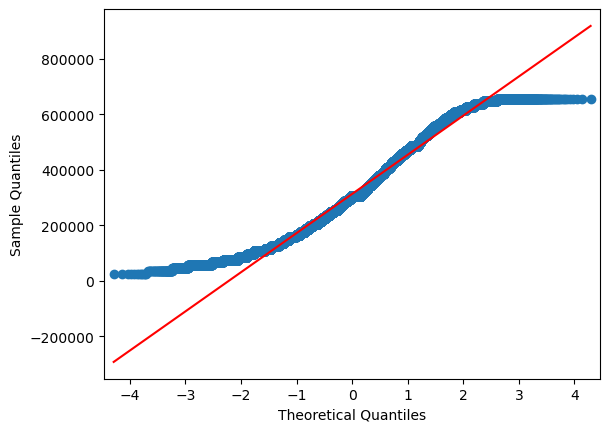

***********
HISTOGRAM
***********



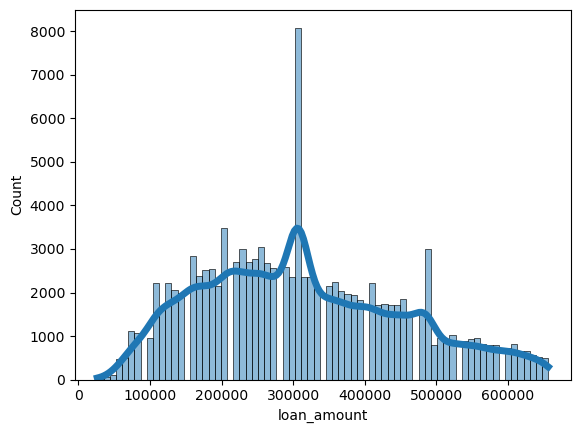

In [1175]:
test_for_normality(default,'loan_amount')

***********
QQ PLOT
***********



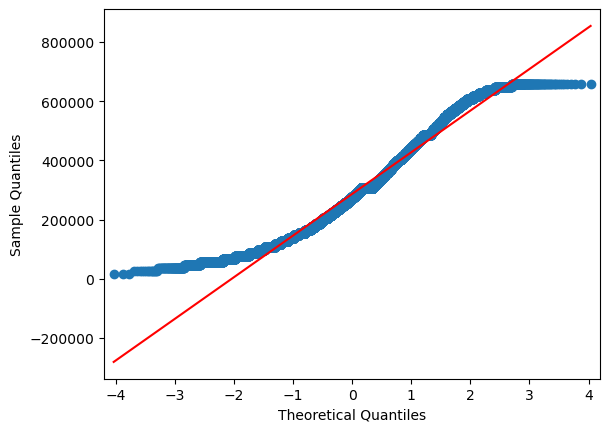

***********
HISTOGRAM
***********



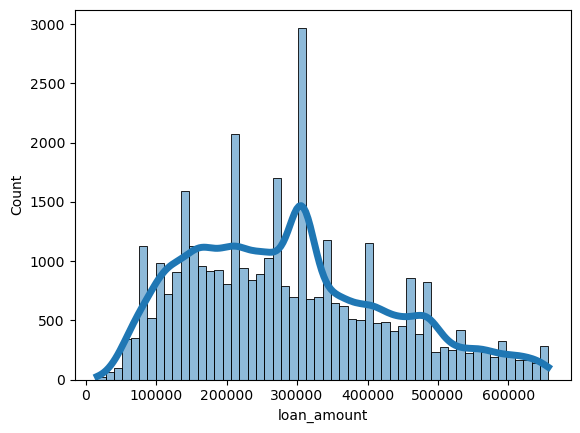

In [1176]:
test_for_normality(non_default,'loan_amount')

In [1177]:
test_for_variance(default,non_default,'loan_amount','Loan Amount')

***************************
Levene Test for checking equality of Variance of Loan Amount across defaulter and non-defaulters
***************************

Variances are equal


In [1178]:
def_sample=sampling(default,'loan_amount')
non_def_sample=sampling(non_default,'loan_amount')

***********
QQ PLOT
***********



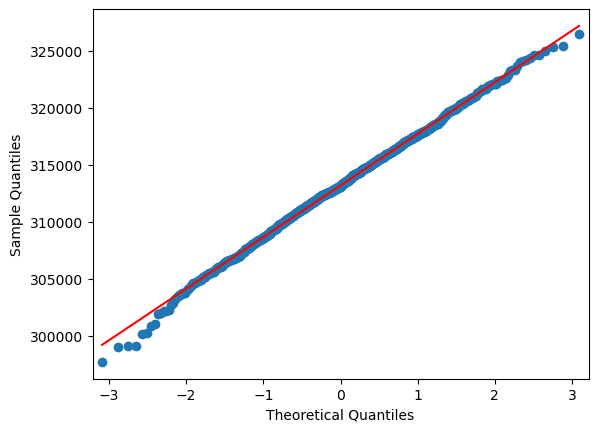

***********
HISTOGRAM
***********



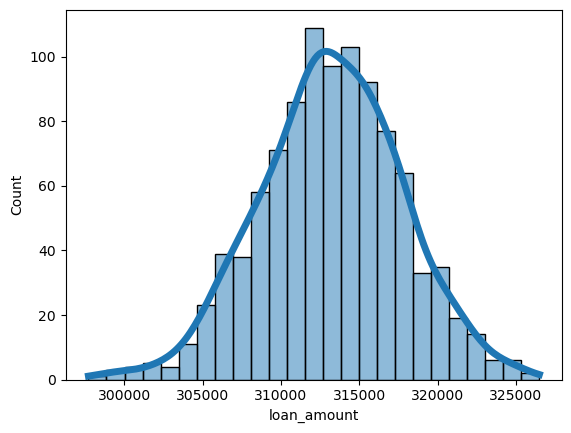

In [1179]:
test_for_normality(def_sample,'loan_amount')

***********
QQ PLOT
***********



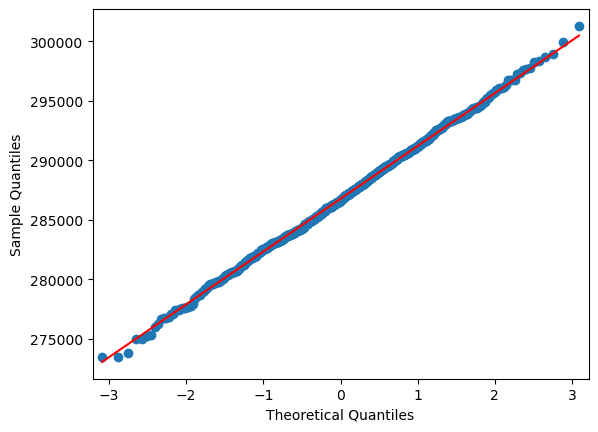

***********
HISTOGRAM
***********



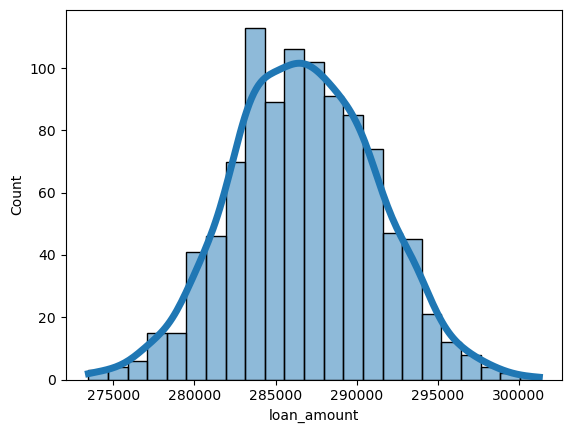

In [1180]:
test_for_normality(non_def_sample,'loan_amount')

In [1181]:
test_for_variance(def_sample,non_def_sample,'loan_amount','Loan Amount')

***************************
Levene Test for checking equality of Variance of Loan Amount across defaulter and non-defaulters
***************************

Variances are equal


In [1182]:
two_sample_ttest(def_sample['loan_amount'],non_def_sample['loan_amount'],'Loan Amount')

Since the pvalue is less than the confidence level, we can conclude that Loan Amount of defaulters is greater than that of non_defaulters.Hence Loan Amount impacts Loan Status.


## Rate of Interest vs Loan Status 

***********
QQ PLOT
***********



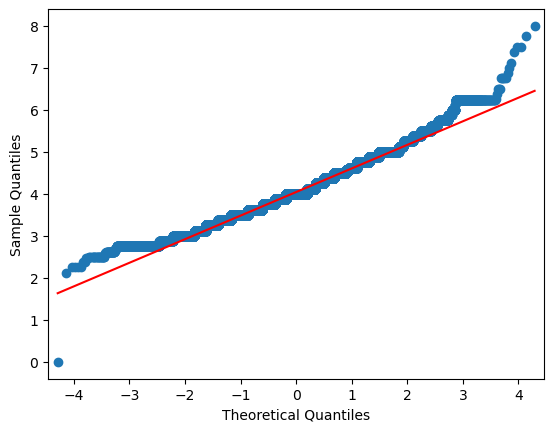

***********
HISTOGRAM
***********



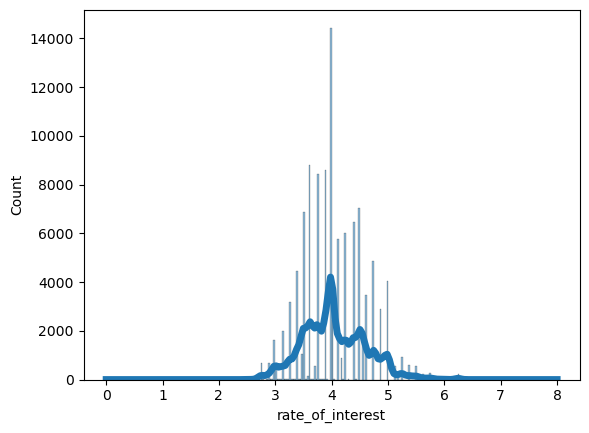

In [1183]:
test_for_normality(default,'rate_of_interest')

***********
QQ PLOT
***********



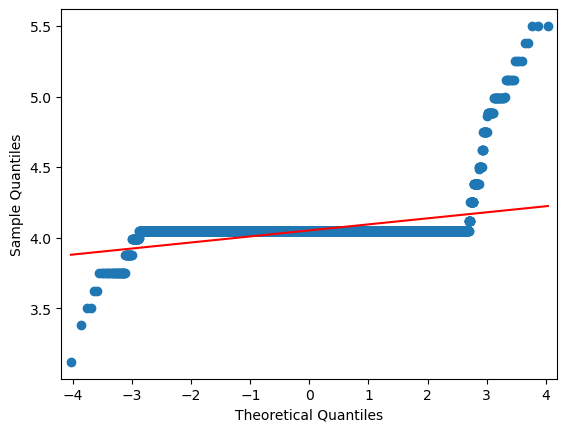

***********
HISTOGRAM
***********



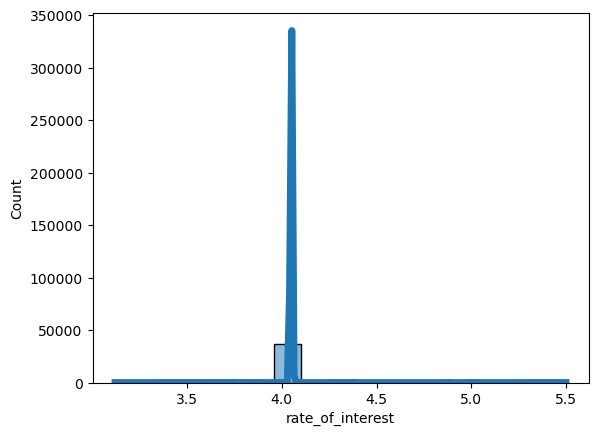

In [1184]:
test_for_normality(non_default,'rate_of_interest')

In [1185]:
test_for_variance(default,non_default,'rate_of_interest','Rate of Interest')

***************************
Levene Test for checking equality of Variance of Rate of Interest across defaulter and non-defaulters
***************************

Variances are not equal


In [1186]:
def_sample=sampling(default,'rate_of_interest')
non_def_sample=sampling(non_default,'rate_of_interest')

***********
QQ PLOT
***********



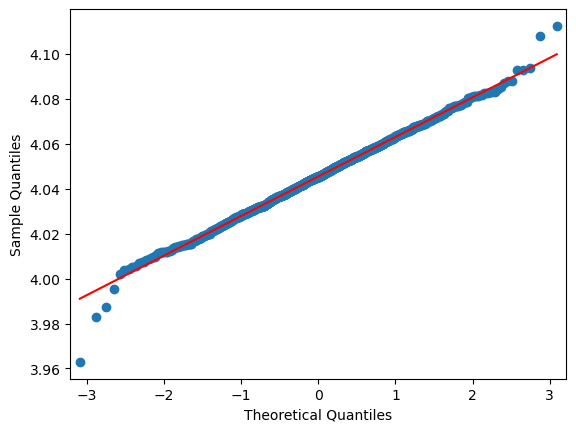

***********
HISTOGRAM
***********



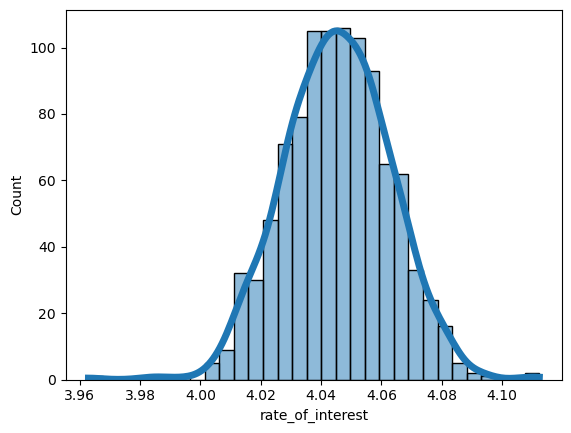

In [1187]:
test_for_normality(def_sample,'rate_of_interest')

***********
QQ PLOT
***********



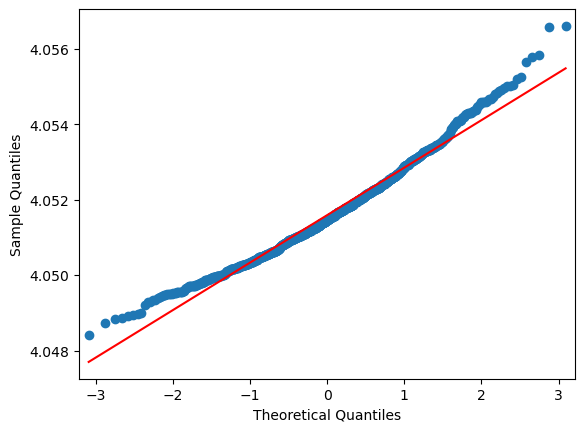

***********
HISTOGRAM
***********



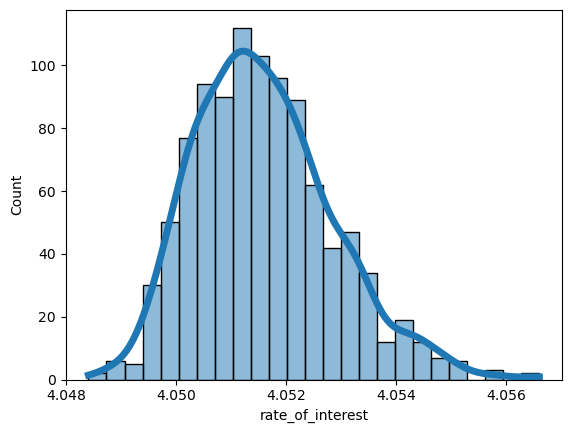

In [1188]:
test_for_normality(non_def_sample,'rate_of_interest')

In [1189]:
test_for_variance(def_sample,non_def_sample,'rate_of_interest','Rate of Interest')

***************************
Levene Test for checking equality of Variance of Rate of Interest across defaulter and non-defaulters
***************************

Variances are not equal


### As variances are not equal, we perform Welch's t-test 

In [1190]:
two_sample_ttest(def_sample['rate_of_interest'],non_def_sample['rate_of_interest'],'Rate of Interest',variance=False)

Since the pvalue is more than the confidence level, we can conclude that Rate of Interest of defaulters is more or less same as that of non_defaulters.Hence Rate of Interest has no impact on Loan Status.


## Upfront Charges vs Loan Status 

***********
QQ PLOT
***********



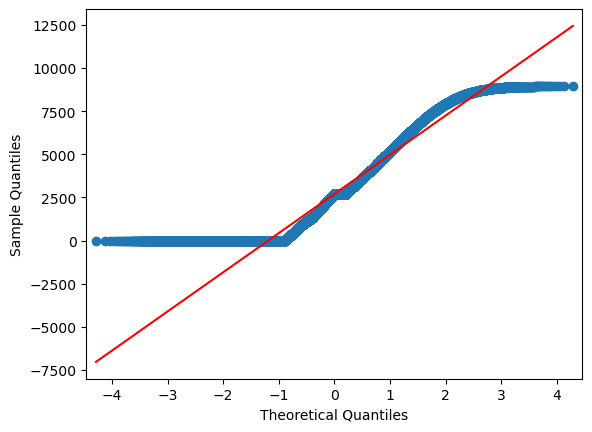

***********
HISTOGRAM
***********



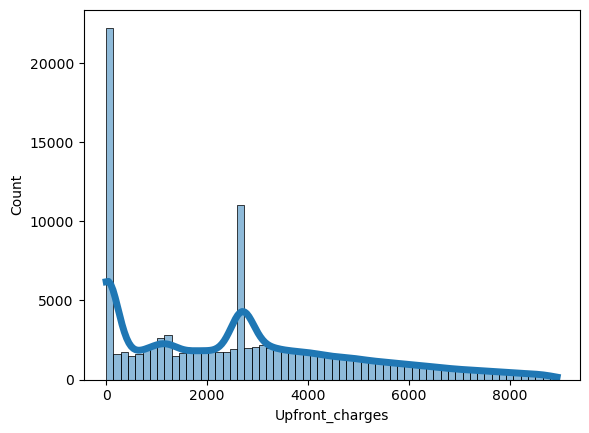

In [1191]:
test_for_normality(default,'Upfront_charges')

***********
QQ PLOT
***********



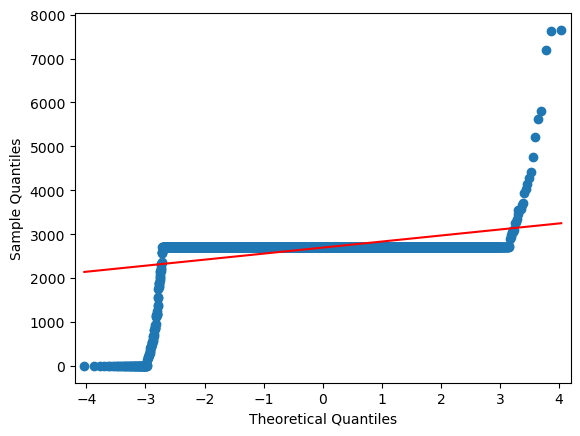

***********
HISTOGRAM
***********



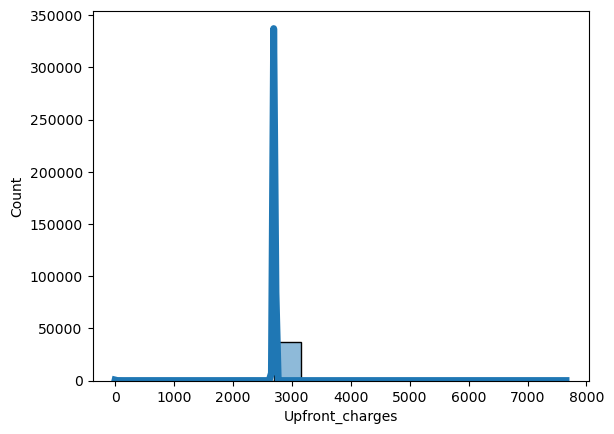

In [1192]:
test_for_normality(non_default,'Upfront_charges')

In [1193]:
test_for_variance(default,non_default,'Upfront_charges','Upfront Charges')

***************************
Levene Test for checking equality of Variance of Upfront Charges across defaulter and non-defaulters
***************************

Variances are not equal


In [1194]:
def_sample=sampling(default,'Upfront_charges')
non_def_sample=sampling(non_default,'Upfront_charges')

***********
QQ PLOT
***********



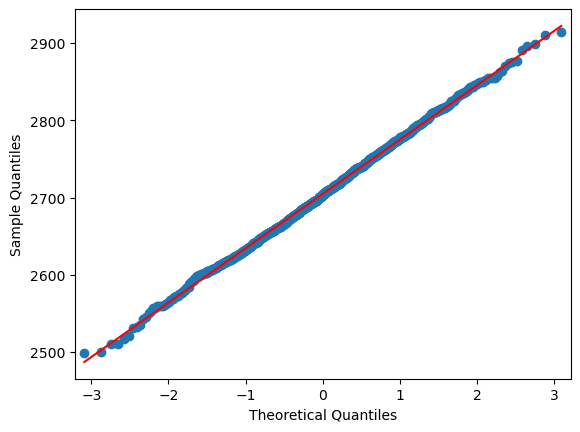

***********
HISTOGRAM
***********



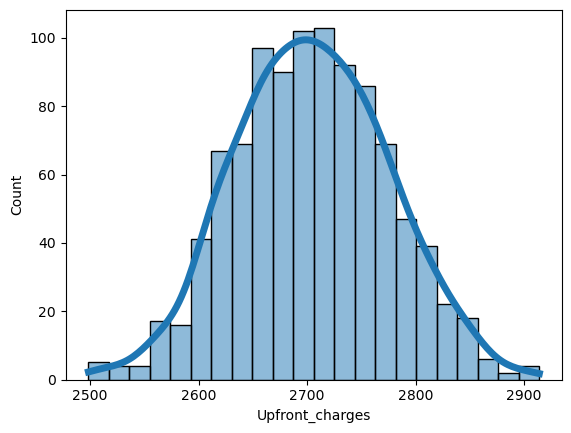

In [1195]:
test_for_normality(def_sample,'Upfront_charges')

***********
QQ PLOT
***********



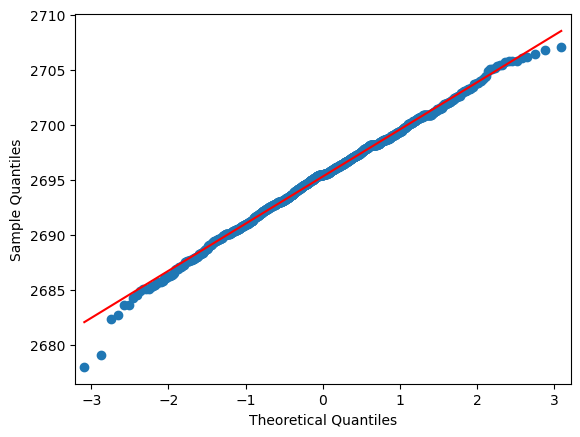

***********
HISTOGRAM
***********



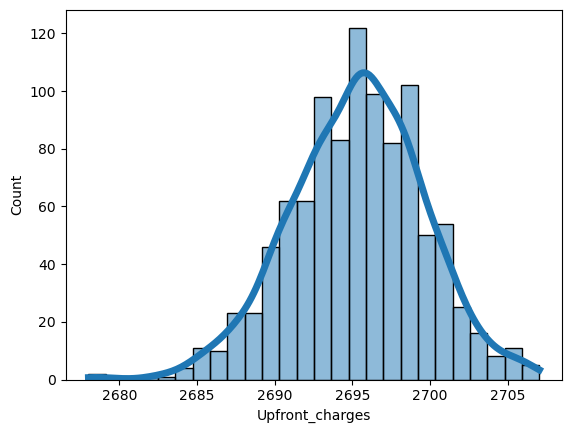

In [1196]:
test_for_normality(non_def_sample,'Upfront_charges')

In [1197]:
test_for_variance(def_sample,non_def_sample,'Upfront_charges','Upfront_charges')

***************************
Levene Test for checking equality of Variance of Upfront_charges across defaulter and non-defaulters
***************************

Variances are not equal


### As variances are not equal, we perform Welch's t-test 

In [1198]:
two_sample_ttest(def_sample['Upfront_charges'],non_def_sample['Upfront_charges'],'Upfront_charges',alternative='less',variance=False)

Since the pvalue is more than the confidence level, we can conclude that Upfront_charges of defaulters is more or less same as that of non_defaulters.Hence Upfront_charges has no impact on Loan Status.


## Property Value 

***********
QQ PLOT
***********



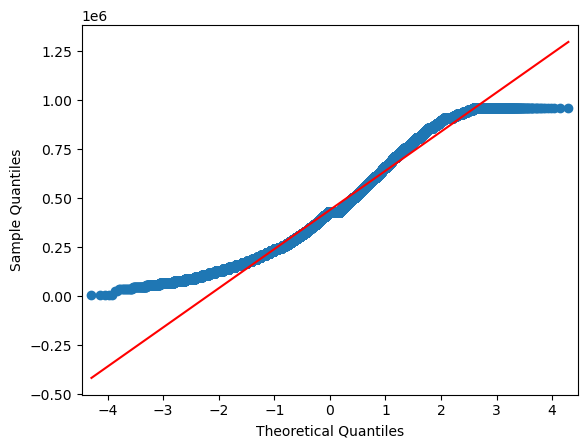

***********
HISTOGRAM
***********



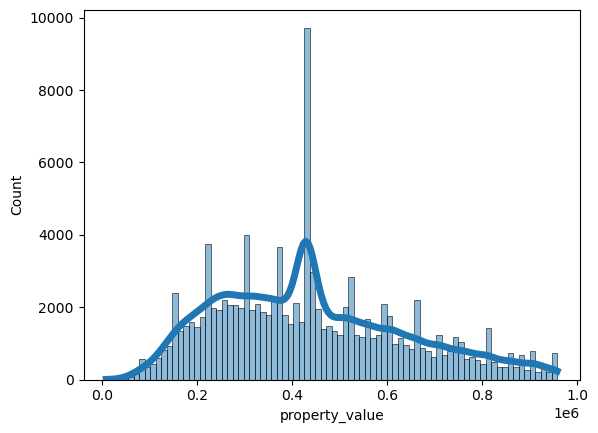

In [1199]:
test_for_normality(default,'property_value')

***********
QQ PLOT
***********



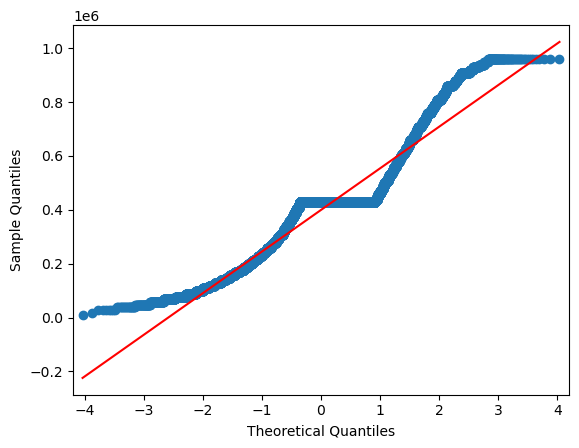

***********
HISTOGRAM
***********



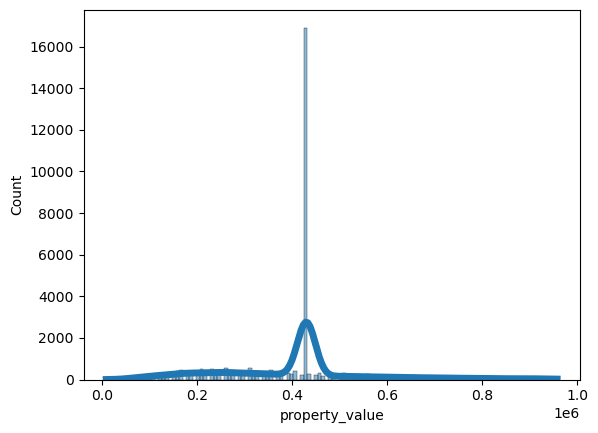

In [1200]:
test_for_normality(non_default,'property_value')

In [1201]:
test_for_variance(default,non_default,'property_value','Property Value')

***************************
Levene Test for checking equality of Variance of Property Value across defaulter and non-defaulters
***************************

Variances are not equal


In [1202]:
def_sample=sampling(default,'property_value')
non_def_sample=sampling(non_default,'property_value')

***********
QQ PLOT
***********



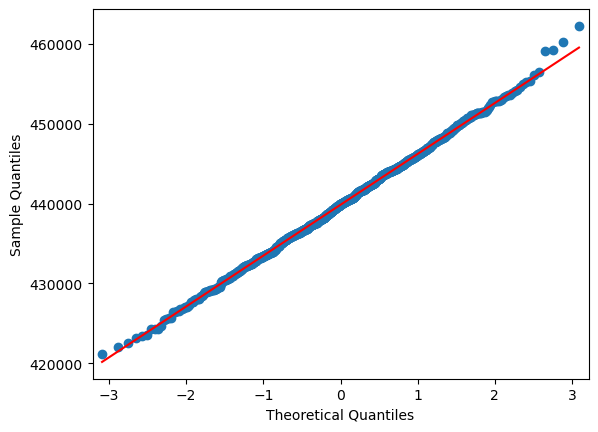

***********
HISTOGRAM
***********



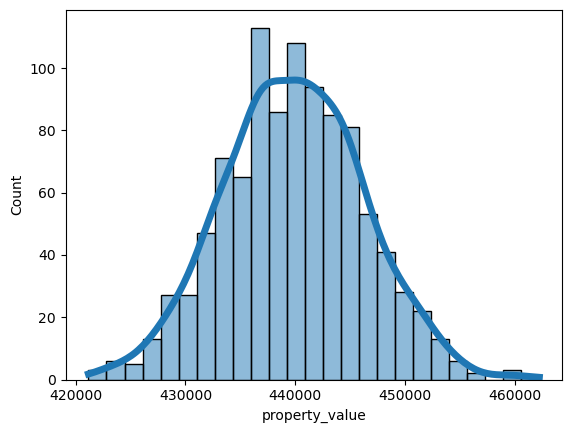

In [1203]:
test_for_normality(def_sample,'property_value')

***********
QQ PLOT
***********



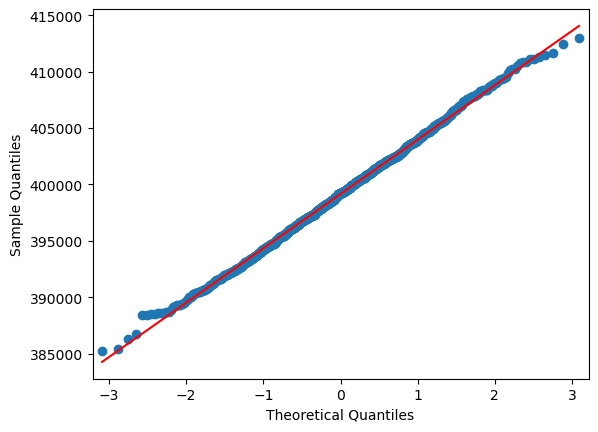

***********
HISTOGRAM
***********



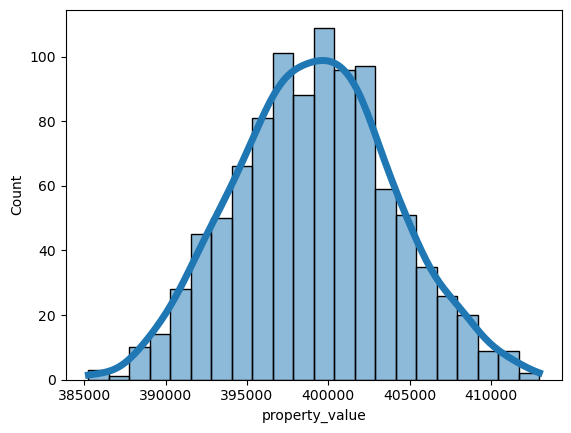

In [1204]:
test_for_normality(non_def_sample,'property_value')

In [1205]:
test_for_variance(def_sample,non_def_sample,'property_value','Property Value')

***************************
Levene Test for checking equality of Variance of Property Value across defaulter and non-defaulters
***************************

Variances are not equal


### As variances are not equal, we perform Welch's t-test 

In [1206]:
two_sample_ttest(def_sample['property_value'],non_def_sample['property_value'],'Property Value',variance=False)

Since the pvalue is less than the confidence level, we can conclude that Property Value of defaulters is not equal to non_defaulters.Hence Property Value impacts Loan Status.


## Income vs Loan Status 

***********
QQ PLOT
***********



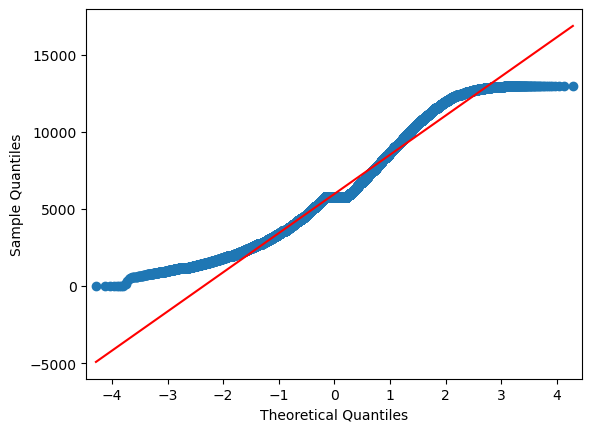

***********
HISTOGRAM
***********



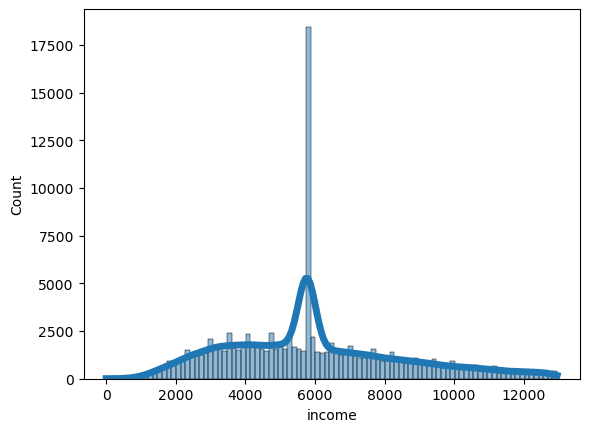

In [1207]:
test_for_normality(default,'income')

***********
QQ PLOT
***********



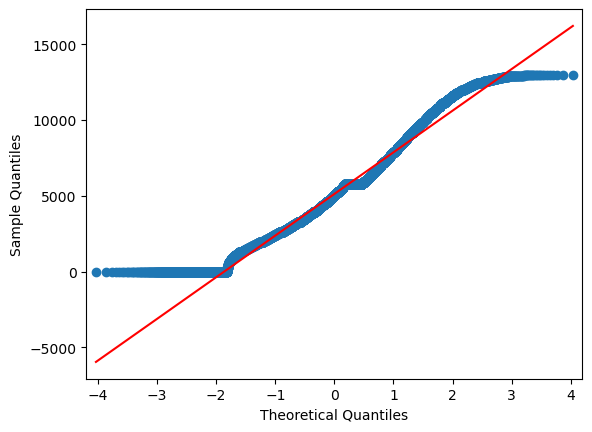

***********
HISTOGRAM
***********



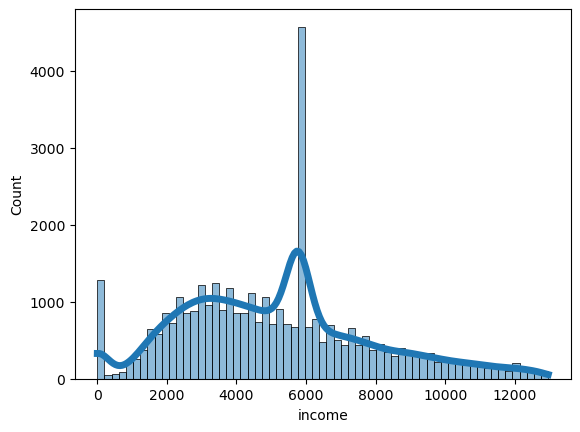

In [1208]:
test_for_normality(non_default,'income')

In [1209]:
test_for_variance(default,non_default,'income','Income')

***************************
Levene Test for checking equality of Variance of Income across defaulter and non-defaulters
***************************

Variances are not equal


In [1210]:
def_sample=sampling(default,'income')
non_def_sample=sampling(non_default,'income')

***********
QQ PLOT
***********



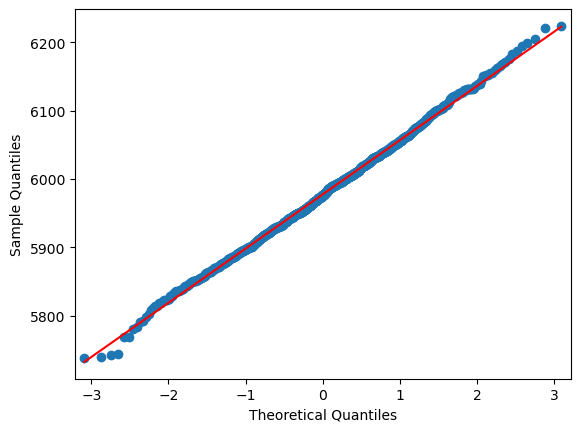

***********
HISTOGRAM
***********



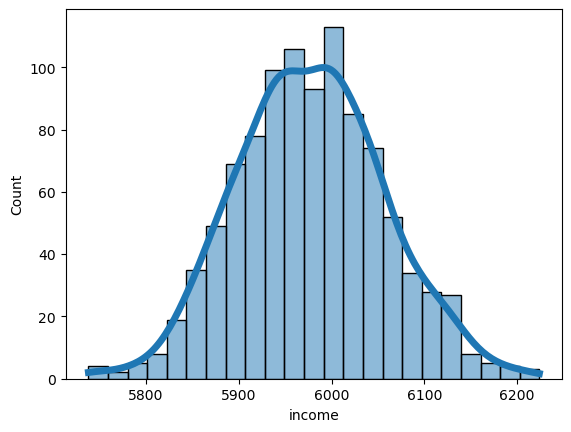

In [1211]:
test_for_normality(def_sample,'income')

***********
QQ PLOT
***********



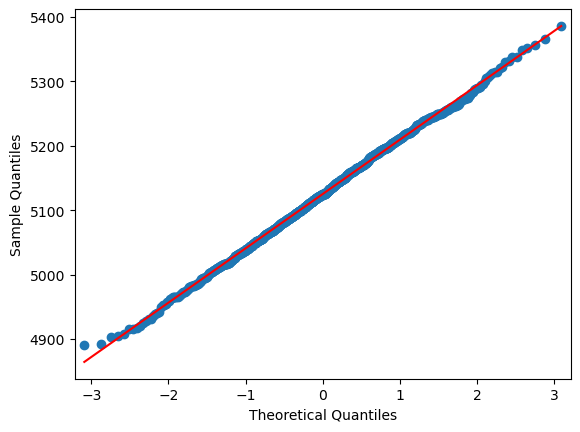

***********
HISTOGRAM
***********



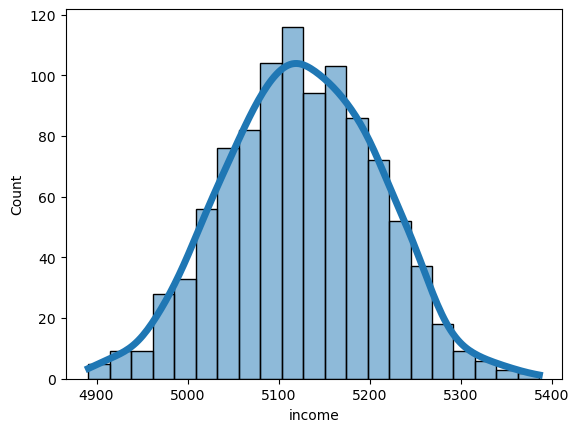

In [1212]:
test_for_normality(non_def_sample,'income')

In [1213]:
test_for_variance(def_sample,non_def_sample,'income','income')

***************************
Levene Test for checking equality of Variance of income across defaulter and non-defaulters
***************************

Variances are not equal


In [1214]:
two_sample_ttest(def_sample['income'],non_def_sample['income'],'income',alternative='less')

Since the pvalue is more than the confidence level, we can conclude that income of defaulters is more or less same as that of non_defaulters.Hence income has no impact on Loan Status.


## LTV vs Loan Status 

***********
QQ PLOT
***********



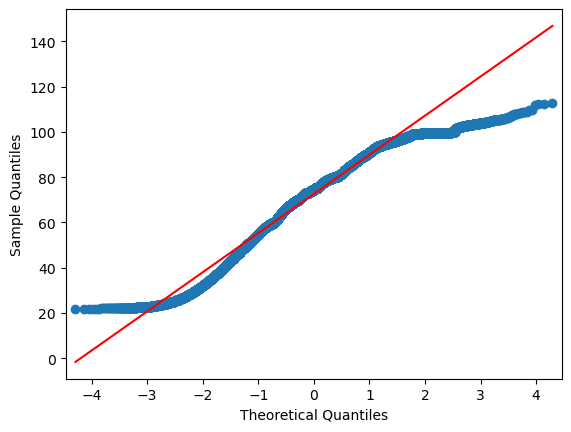

***********
HISTOGRAM
***********



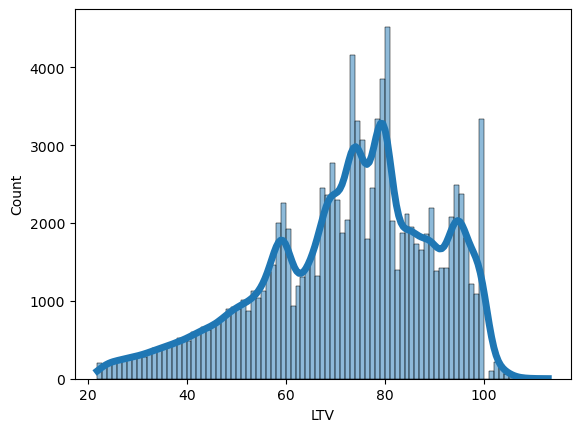

In [1215]:
test_for_normality(default,'LTV')

***********
QQ PLOT
***********



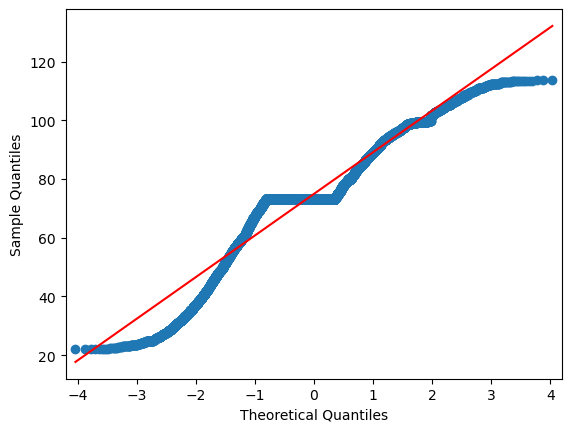

***********
HISTOGRAM
***********



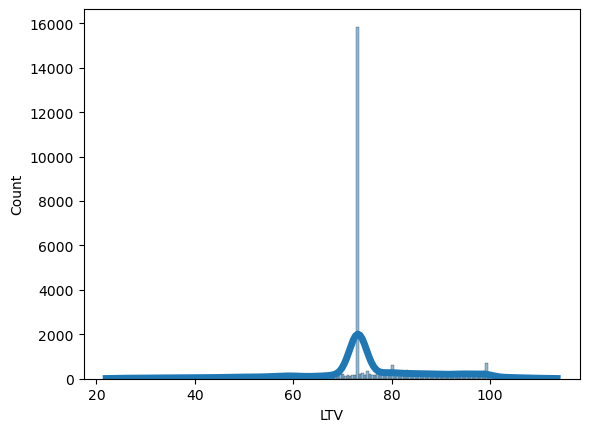

In [1216]:
test_for_normality(non_default,'LTV')

In [1217]:
test_for_variance(default,non_default,'LTV','LTV')

***************************
Levene Test for checking equality of Variance of LTV across defaulter and non-defaulters
***************************

Variances are not equal


In [1218]:
def_sample=sampling(default,'LTV')
non_def_sample=sampling(non_default,'LTV')

***********
QQ PLOT
***********



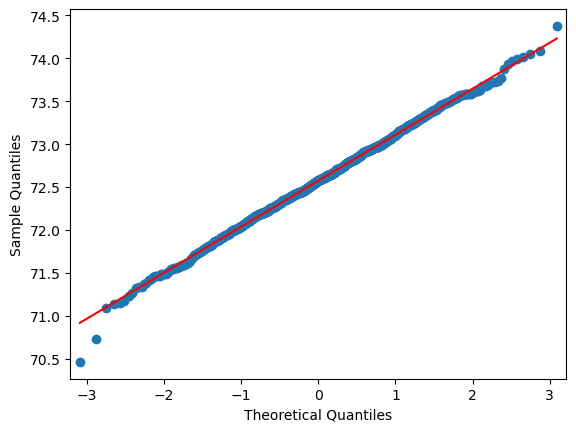

***********
HISTOGRAM
***********



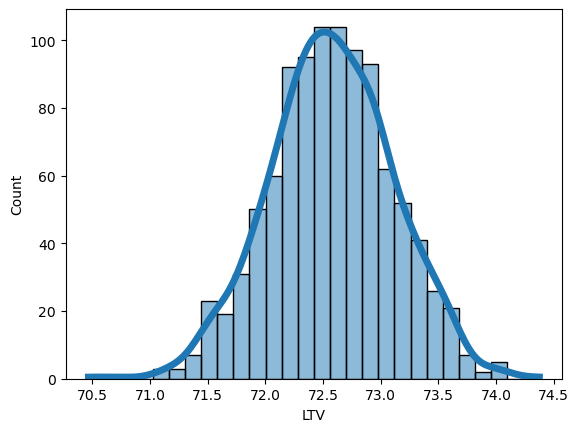

In [1219]:
test_for_normality(def_sample,'LTV')

***********
QQ PLOT
***********



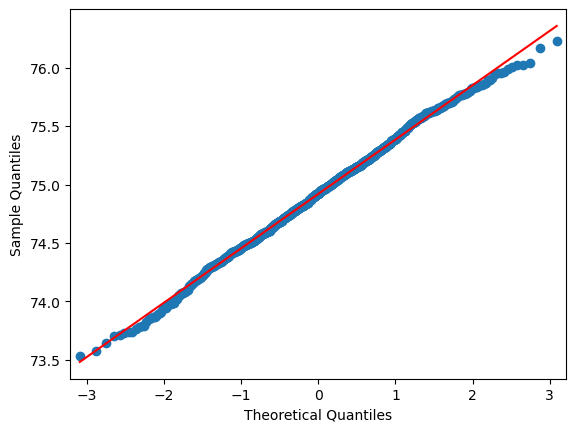

***********
HISTOGRAM
***********



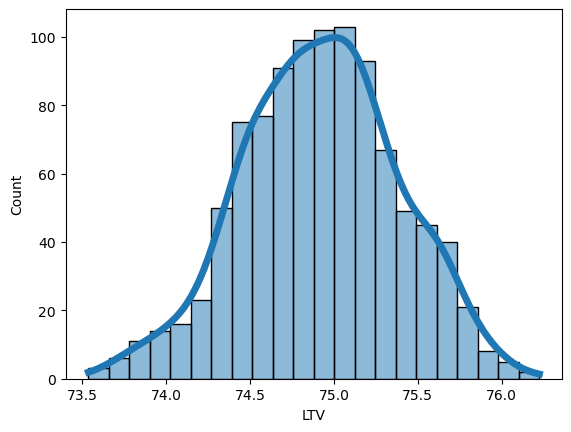

In [1220]:
test_for_normality(non_def_sample,'LTV')

In [1221]:
test_for_variance(def_sample,non_def_sample,'LTV','LTV')

***************************
Levene Test for checking equality of Variance of LTV across defaulter and non-defaulters
***************************

Variances are not equal


In [1222]:
two_sample_ttest(def_sample['LTV'],non_def_sample['LTV'],'LTV',variance=False)

Since the pvalue is more than the confidence level, we can conclude that LTV of defaulters is more or less same as that of non_defaulters.Hence LTV has no impact on Loan Status.


In [1223]:
df_numeric=df[['loan_amount','income','property_value','Upfront_charges','LTV','rate_of_interest','Status']]

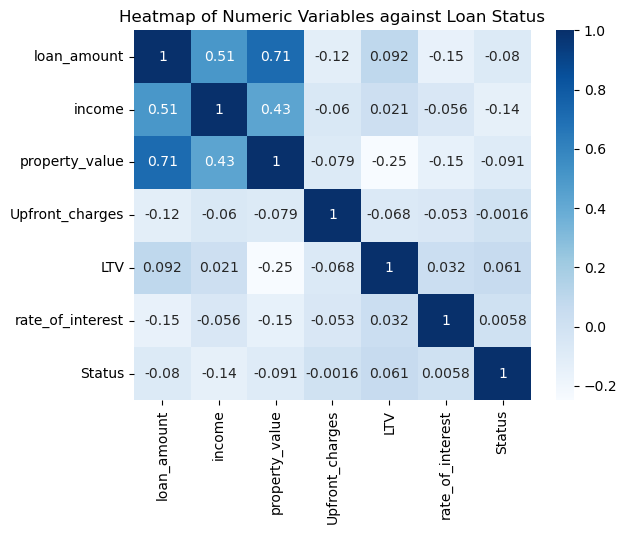

In [1224]:
sns.heatmap(df_numeric.corr(),cmap='Blues',annot=True)
plt.title("Heatmap of Numeric Variables against Loan Status")
plt.show()

# High Lisk for Lenders

### -> Type 1 loans
### -> p3,p4 purpose loans
### -> Fixed and Personal loans
### -> loans to north and south region borrowers
### -> loans to primary residents
### -> high loan amounts
### -> high property value loans
